In [1]:
import proxUtil
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import MDS

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import geomstats.backend as gs
import geomstats.visualization as visualization
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

# Code for Experiment 4 functions

INFO: Using numpy backend


In [3]:
#& Data Constants
SEEDS = [61, 737, 821, 161, 346, 78, 2, 67, 102, 982]

In [4]:
#& Generate Data Functions
def create_3d_sphere_data(seed):
    """Creates two clusters on a 3d sphere"""

    np.random.seed(seed)
    gs.random.seed(seed)

    sphere = Hypersphere(dim=2)
    cluster = sphere.random_von_mises_fisher(kappa=20, n_samples=150)

    SO3 = SpecialOrthogonal(3, equip=False)
    rotation1 = SO3.random_uniform()
    rotation2 = SO3.random_uniform()

    cluster_1 = cluster @ rotation1
    cluster_2 = cluster @ rotation2

    #Create labels
    labels_1 = np.zeros(cluster_1.shape[0])
    labels_2 = np.ones(cluster_2.shape[0])
    labels = np.concatenate([labels_1, labels_2])

    #Combine data
    data = np.concatenate([cluster_1, cluster_2], axis=0)
    
    return data, labels, sphere

def to_spherical_coords(data):
    """Convert 3D points on the unit sphere to 2D spherical coordinates (polar, azimuthal)."""
    x, y, z = data[:, 0], data[:, 1], data[:, 2]
    r = np.linalg.norm(data, axis=1)
    r = np.where(r == 0, 1e-8, r)
    polar = np.arccos(z / r)
    azimuth = np.arctan2(y, x)
    return np.vstack((polar, azimuth)).T

In [5]:
thing1 = create_3d_sphere_data(SEEDS[3])

In [6]:
X = thing1[0]
y = thing1[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
trainDS = pd.DataFrame(data=X_train)
trainDS.insert(loc=0, column='labels', value=y_train.astype(int))

testDS = pd.DataFrame(data=X_test)
testDS.insert(loc=0, column='labels', value=y_test.astype(int))

In [8]:
trainDS.to_csv("sphere_train.tsv",sep="\t",header=False,index=False)
testDS.to_csv("sphere_test.tsv",sep="\t",header=False,index=False)

In [9]:
# First, we train a PF model and give it the name 'Spartacus'
# By default, this will create a number of files (names can be specified by arguments):
    #1. Spartacus.ser: the serialized trained model
    #2. ytrain.txt: the training labels, used in computing outlier scores later
    #3. ForestProximities.txt: the array of proximities
    #4. Predictions.txt: the predictions on the given test data.

#proxUtil.getProx("Data/GunPoint_TRAIN.tsv", "Data/GunPoint_TEST.tsv", modelname="Spartacus")

#This implementation has been expanded so as to handle user-specified distance(s):
#proxUtil.getProx("Data/GunPoint_TRAIN.tsv", "Data/GunPoint_TEST.tsv", modelname="Spartacus", distances=['dtw','ddtw'])

#In particular, Euclidean distance for time-independent data
#proxUtil.getProx("Data/GunPoint_TRAIN.tsv", "Data/GunPoint_TEST.tsv", modelname="Spartacus", distances=['euclidean'])
proxUtil.getProx("sphere_train.tsv", "sphere_test.tsv", modelname="Spartacus", distances=['euclidean'])

#One can also use a python-specified distance. A file called 'PythonDistance.py' must be in the directory the .jar file is called,
    # the function must be called 'Distance' See the PythonDistance.py file for an example and acceptable call signature.
#proxUtil.getProx("Data/GunPoint_TRAIN.tsv", "Data/GunPoint_TEST.tsv", modelname="Spartacus", distances=['python'], num_trees=11)

# Similarly, one can use a function defined by a MapleDistances.mpl file (in particular, for Manifold distances)
#proxUtil.getProx("Data/GunPoint_TRAIN.tsv", "Data/GunPoint_TEST.tsv", modelname="Spartacus", distances=['maple'], num_trees=11)

reading file [sphere_test.tsv]:finished in 0:0:0.008
reading file [sphere_train.tsv]:finished in 0:0:0.006
Running on configurations...
Dataset: sphere_train.tsv, Training Data : 201x3 , Testing Data: 99x3, Train #Classes: 2, Test #Classes: 2
Repeats: 1 , Trees: 11 , Candidates per Split(r): 5
Output Dir: output, Export: 1, Verbosity: 1
Select DM per node: true , Shuffle Data: false, JVM WarmUp: false
----------------------------------------------------------------------------------------------------

-----------------Repetition No: 1 (sphere_train.tsv)   -----------------
Using: 4 MB, Free: 13 MB, Allocated Pool: 17 MB, Max Available: 1024 MB
core.ProximityForestResult@4783da3f
0.1.2.3.4.5.6.7.8.9.10.
Using: 6 MB, Free: 11 MB, Allocated Pool: 17 MB, Max Available: 1024 MB
*
Computing Forest Proximities...
Done Computing Forest Proximities. Computation time: 132.0ms
Training Time: 39.342176ms (0:0:0.039)
Prediction Time: 0.533322ms (0:0:0.000)
Correct(TP+TN): 96 vs Incorrect(FP+FN): 3


In [ ]:
# Here are the predictions on the test set.
f0 = open("Predictions.txt")
f1 = f0.read()
preds = eval("np.array(" + f1 + ")")
f0.close()

In [11]:
len(preds)

99

In [12]:
preds

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [13]:
len(y_test)

99

In [14]:
y_test

array([1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.])

In [15]:
# We can now read a model by name and obtain predictions. This creates:
    #1. Predictions_saved.txt: the predicted labels of the read-in model.
proxUtil.evalPF("sphere_test.tsv", modelname="Spartacus")

reading file [sphere_test.tsv]:finished in 0:0:0.007

*


In [16]:
# Here are the predictions (of the saved model) on the test set.
f0 = open("Predictions_saved.txt")
f1 = f0.read()
preds_saved = eval("np.array(" + f1 + ")")
f0.close()

In [17]:
# Just checking: are the outputs of the saved model equal to the original predictions?
np.unique([preds[i]-preds_saved[i] for i in range(len(preds))])

array([0])

In [18]:
len(preds_saved)

99

In [19]:
accuracy_score(y_test.astype(int),preds_saved)

0.9696969696969697

In [20]:
# the following can be used to obtain the proximities (p) and training labels (y)
p,y=proxUtil.getProxArrays()

In [21]:
# The raw proximities are not symmetric. But in some applications, one desires symmetry.
p = proxUtil.SymmetrizeProx(p)

In [22]:
# The following can be used to obtain outlier scores.
# Note that these are intra-class outlier scores.
outlier_scores = proxUtil.getOutlierScores(p,y)

In [23]:
# The proximities can be used to obtain a vector embedding.
# we will prepare a visual, using size to indicate intra-class outlier-ness.
embed = MDS(n_components=2, random_state=0, dissimilarity='precomputed')
dis = (np.ones(p.shape) - p)**4
x_trans = embed.fit_transform(dis)
xt = x_trans.transpose()
sizes = [x*100 for x in outlier_scores]

/home/ben/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


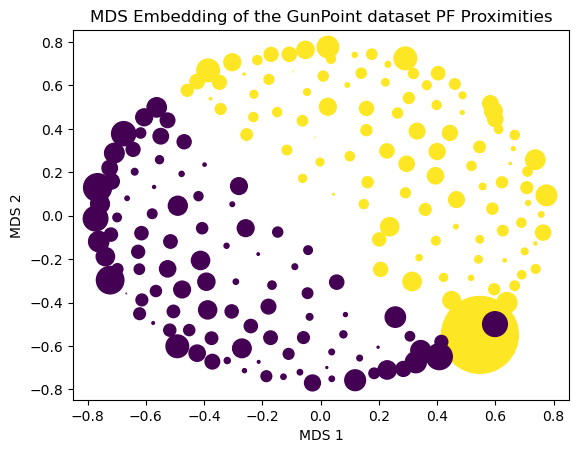

In [24]:
plt.scatter(xt[0],xt[1],c=y,s=sizes)
plt.title("MDS Embedding of the GunPoint dataset PF Proximities")
plt.xlabel("MDS 1")
plt.ylabel("MDS 2")
plt.show()

In [25]:
X1 = np.array([x_trans[i] for i in range(x_trans.shape[0]) if y[i]==0]).transpose()
X2 = np.array([x_trans[i] for i in range(x_trans.shape[0]) if y[i]==1]).transpose()
eX = [X1,X2]

outs1 = np.array([sizes[i] for i in range(x_trans.shape[0]) if y[i]==0]).transpose()
outs2 = np.array([sizes[i] for i in range(x_trans.shape[0]) if y[i]==1]).transpose()
Outs = [outs1,outs2]

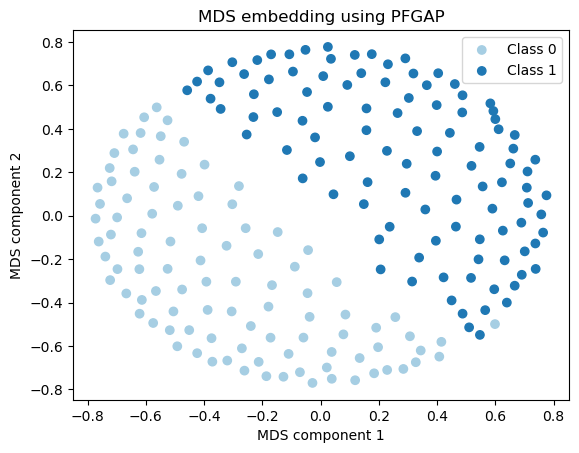

In [26]:
cmap = plt.cm.Paired
#plt.figure(figsize = (15,10))
for i in range(1,3):
    cmap1 = [i-1 for j in range(eX[i-1].shape[1])]
    #if y[np.argmax(sizes)] == i:
     #   cmap1[np.argmax(eval("outs" + str(i)))] = 5
    #plt.scatter(eX[i-1][0], eX[i-1][1], c=cmap(cmap1), s=Outs[i-1],
     #           label="Class {:g}".format(i-1))
    plt.scatter(eX[i-1][0], eX[i-1][1], c=cmap(cmap1),
                label="Class {:g}".format(i-1))
    
plt.legend()
plt.xlabel('MDS component 1')
plt.ylabel('MDS component 2')
plt.title('MDS embedding using PFGAP')
plt.show()